## 1. Exploración del dataset

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

In [32]:
# Cargar el dataset Diabetes
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [20]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [21]:
# Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [22]:
# Tamaño del dataset
print("\nTamaño del dataset:", df.shape)


Tamaño del dataset: (442, 11)


## 2. Reducción de dimensionalidad con PCA


In [23]:
# Definir una función para realizar y visualizar la reducción dimensional con PCA
def pca_analysis(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Explicación de la varianza
    explained_variance = pca.explained_variance_ratio_
    cumsum_variance = np.cumsum(explained_variance)
    
    print(f"\nComponentes: {n_components}")
    print("Varianza explicada por cada componente:", explained_variance)
    print("Varianza acumulada:", cumsum_variance)
    
    # Visualización de la varianza acumulada
    plt.figure()
    plt.plot(range(1, n_components+1), cumsum_variance, marker='o')
    plt.title('Varianza acumulada por PCA')
    plt.xlabel('Número de componentes principales')
    plt.ylabel('Varianza acumulada')
    plt.grid()
    plt.show()
    
    return X_pca

In [24]:
# Separar las características y la etiqueta
y = df['target']
X = df.drop('target', axis=1)


Componentes: 2
Varianza explicada por cada componente: [0.40242108 0.14923197]
Varianza acumulada: [0.40242108 0.55165304]


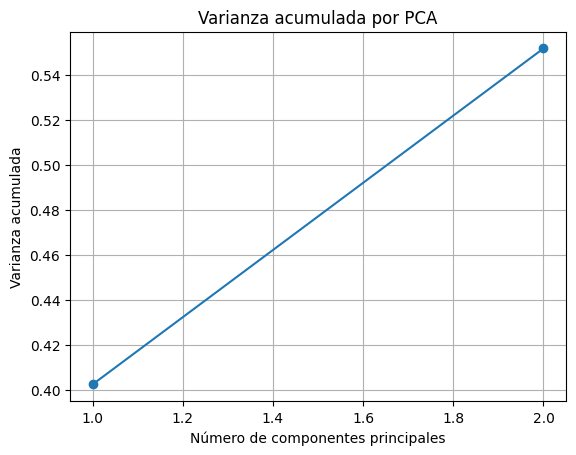

In [25]:
# Aplicar PCA con 2 componentes para visualización
X_pca_2 = pca_analysis(X, n_components=2)

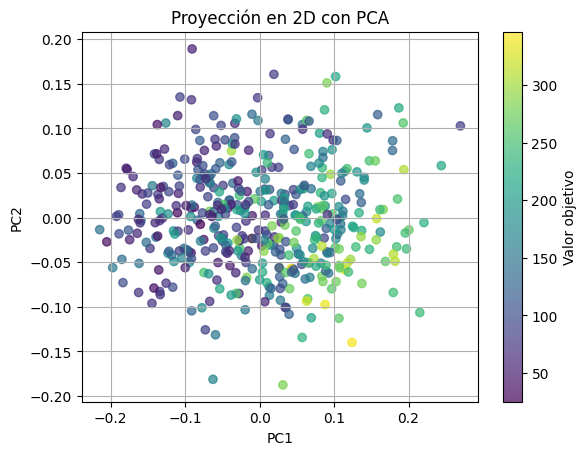

In [26]:
# Visualizar los datos proyectados en 2D
plt.figure()
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Valor objetivo')
plt.title('Proyección en 2D con PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


## 3. Reducción de dimensionalidad con NMF


In [27]:
# Escalar los datos al rango [0, 1] para NMF
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Definir una función para realizar y visualizar la reducción dimensional con NMF
def nmf_analysis(X, n_components):
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    X_nmf = nmf.fit_transform(X)
    
    print(f"\nComponentes: {n_components}")
    print("Reconstrucción del error:", nmf.reconstruction_err_)
    
    return X_nmf

In [30]:
# Aplicar NMF con 2 componentes
X_nmf_2 = nmf_analysis(X_scaled, n_components=2)


Componentes: 2
Reconstrucción del error: 9.199958478563815


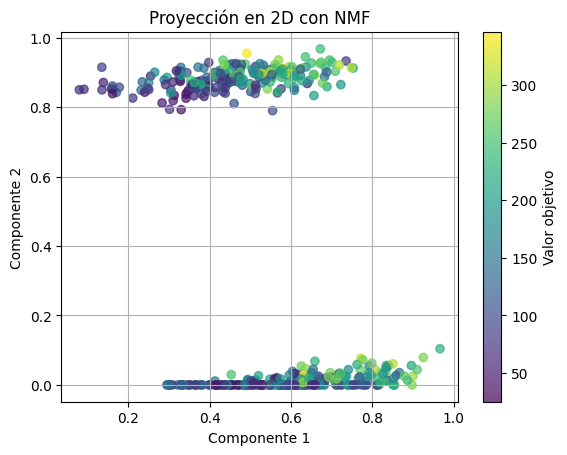

In [31]:
# Visualizar los datos proyectados en 2D
plt.figure()
plt.scatter(X_nmf_2[:, 0], X_nmf_2[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Valor objetivo')
plt.title('Proyección en 2D con NMF')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()